In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import random

In [4]:
%matplotlib inline

In [180]:
class Tool:
    def __init__(self):
        # self.bg_path = '../../dataset/none_normal/none_normal/'
        # self.bg_path = 'E:/synRailoBS/frames1/'
        self.bg_path = ''
        self.person_path =  '../../dataset/sam-obj/person/'
        self.bg_img_list = glob.glob(os.path.join(self.bg_path,'*.jpg'))
        self.person_img_list = glob.glob(os.path.join(self.person_path,'*.png'))

    def gen_img_mask_anno(self,index):
        bg_img = cv2.imread(random.choice(self.bg_img_list))
        bg_img = cv2.cvtColor(bg_img,cv2.COLOR_BGR2RGB)
        bg_mask = np.zeros((bg_img.shape[0],bg_img.shape[1]))
        person_img = cv2.imread(random.choice(self.person_img_list))
        person_img = cv2.cvtColor(person_img,cv2.COLOR_BGR2RGB)
        pos = (random.randint(500,700),random.randint(300,350))
        re_person_img = self._get_resized_img(person_img,pos)
        h,w,_ = re_person_img.shape
        for i in range(h):
            for j in range(w):
                if re_person_img[i,j].tolist()!=[0,0,0]:
            # print((i,j))
                    bg_img[pos[1]+i,pos[0]+j] = re_person_img[i,j]
                    bg_mask[pos[1]+i,pos[0]+j] = 255
        H,W,_ = bg_img.shape
        x1,y1 = pos
        x2 = x1+w
        y2 = y1+h
        labels = self.convert_to_yolo_format(x1,y1,x2,y2,W,H,0)
        with open('E:/synRailoBS/far/anno/far_{}.txt'.format(index),'w') as f:
            f.write(labels+'\n')
        cv2.imwrite('E:/synRailoBS/far/imgs/far_{}.jpg'.format(index),cv2.cvtColor(bg_img,cv2.COLOR_RGB2BGR))
        cv2.imwrite('E:/synRailoBS/far/masks/far_{}_mask.jpg'.format(index),bg_mask)
        return bg_img,bg_mask
        
    def _get_resized_img(self,person_img,pos):
        h,w,_ = person_img.shape
        tar_w = int(15+(pos[1]-300)*0.4)
        scale = tar_w/w
        tar_h = int(scale*h)
        re_person_img = cv2.resize(person_img,(tar_w,tar_h))
        return re_person_img

    def convert_to_yolo_format(self,x1, y1, x2, y2, w, h, class_id):
    
        x_center = (x1 + x2) / 2.0 / w
        y_center = (y1 + y2) / 2.0 / h
        width = (x2 - x1) / float(w)
        height = (y2 - y1) / float(h)
        return f"{class_id} {x_center} {y_center} {width} {height}"

In [167]:
tool = Tool()

In [178]:
img,mask = tool.gen_img_mask_anno(1)

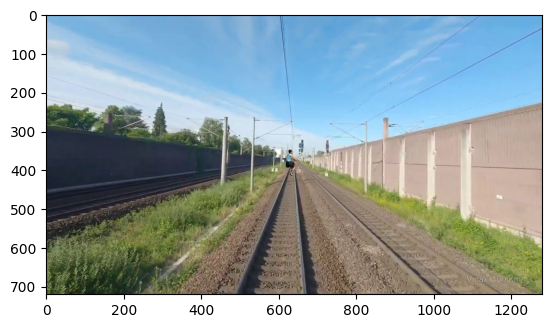

In [179]:
plt.imshow(img)

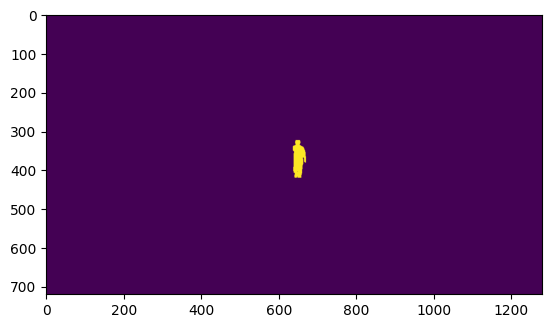

In [157]:
plt.imshow(mask)

In [181]:
for i in range(10000):
    try:
        tool.gen_img_mask_anno(i)
    except:
        continue

In [319]:
class xinjin_Tool:
    def __init__(self):
        # self.bg_path = '../../dataset/none_normal/none_normal/'
        # self.bg_path = 'E:/synRailoBS/frames1/'
        self.bg_path = 'C:\\Users\\44894\\Web\\CaptureFiles\\2025-04-25'
        self.person_path =  '../../dataset/sam-obj/person/'
        self.bg_img_list = glob.glob(os.path.join(self.bg_path,'*.jpg'))
        self.person_img_list = glob.glob(os.path.join(self.person_path,'*.png'))

    def gen_img_mask_anno(self,index):
        bg_img = cv2.imread(random.choice(self.bg_img_list))
        bg_img = cv2.cvtColor(bg_img,cv2.COLOR_BGR2RGB)
        bg_mask = np.zeros((bg_img.shape[0],bg_img.shape[1]))
        person_img = cv2.imread(random.choice(self.person_img_list))
        person_img = cv2.cvtColor(person_img,cv2.COLOR_BGR2RGB)
        pos = (random.randint(550,1000),random.randint(0,500))
        re_person_img = self._get_resized_img(person_img,pos)
        h,w,_ = re_person_img.shape
        for i in range(h):
            for j in range(w):
                if re_person_img[i,j].tolist()!=[0,0,0]:
            # print((i,j))
                    bg_img[pos[1]+i,pos[0]+j] = re_person_img[i,j]
                    bg_mask[pos[1]+i,pos[0]+j] = 255
        H,W,_ = bg_img.shape
        x1,y1 = pos
        x2 = x1+w
        y2 = y1+h
        labels = self.convert_to_yolo_format(x1,y1,x2,y2,W,H,0)
        with open('E:/synRailoBS/xinjin/anno/xinjin_{}.txt'.format(index),'w') as f:
            f.write(labels+'\n')
        cv2.imwrite('E:/synRailoBS/xinjin/imgs/xinjin_{}.jpg'.format(index),cv2.cvtColor(bg_img,cv2.COLOR_RGB2BGR))
        cv2.imwrite('E:/synRailoBS/xinjin/masks/xinjin_{}_mask.jpg'.format(index),bg_mask)
        return bg_img,bg_mask
        
    def _get_resized_img(self,person_img,pos):
        h,w,_ = person_img.shape
        tar_w = int(15+pos[1]*0.35)
        scale = tar_w/w
        tar_h = int(scale*h)
        re_person_img = cv2.resize(person_img,(tar_w,tar_h))
        return re_person_img

    def convert_to_yolo_format(self,x1, y1, x2, y2, w, h, class_id):
    
        x_center = (x1 + x2) / 2.0 / w
        y_center = (y1 + y2) / 2.0 / h
        width = (x2 - x1) / float(w)
        height = (y2 - y1) / float(h)
        return f"{class_id} {x_center} {y_center} {width} {height}"

In [320]:
xinjin_tool = xinjin_Tool()

In [317]:
img,mask = xinjin_tool.gen_img_mask_anno(1)

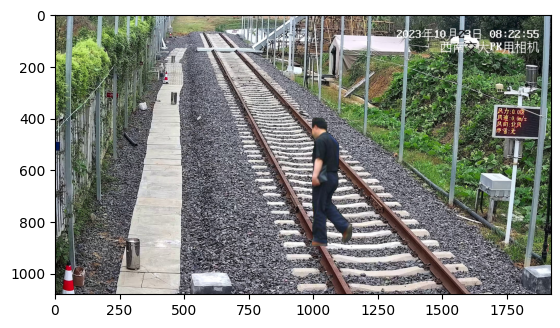

In [318]:
plt.imshow(img)

In [321]:
for i in range(10000):
    try:
        xinjin_tool.gen_img_mask_anno(i)
    except:
        continue